In [ ]:
import numpy as np
import pandas as pd

train = pd.read_excel('原始数据.xlsx').iloc[:4500,:4]
test = pd.read_excel('原始数据.xlsx').iloc[4500:6000,:4]

In [ ]:
# 读取降维后的文件
import numpy as np
import pandas as pd


gearbox_initial = []
for i in range(5):
    gearbox_initial.append(pd.read_excel('pca降维后有效数据.xlsx', i, dtype=np.float32).iloc[:,:5])
    type = gearbox_initial[i]['target'][0]
    gearbox_initial[i]['target'] = type if type ==0 else 1
data = pd.concat(gearbox_initial)

In [ ]:
# 模型训练
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:3], data.iloc[:,-1], train_size=0.75, random_state=0)

gbdt = GradientBoostingClassifier(max_depth=10)
gbdt.fit(X_train, y_train)

In [ ]:
# 输出模型评估

from sklearn.metrics import classification_report
a = classification_report(y_train,
                          gbdt.predict(X_train),
                          digits = 2,#小数点后保留的位数
                          labels = [0,1],#类别的排序
                          target_names = ['正常','故障'],#类别的名称
                          output_dict = False)#结果是否以字典的形式输出
print(a)



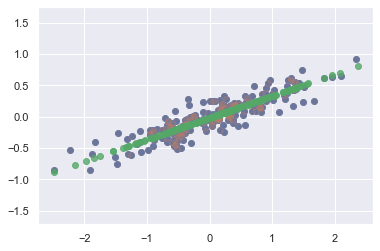

In [2]:
# pca可视化
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

#产生实验数据
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')

pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)

#可视化降维的效果
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.savefig('pca降维可视化.jpg')
plt.show()
